## Exploring 100,000 FSPS models with Diverse SFHs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import h5py

In [2]:
f = h5py.File('../data/1e5_spectra_diverseSFH_17-02-07.hdf5','r')
f.keys()

[u'dusts',
 u'fbursts',
 u'mean_ages',
 u'sdss_mags',
 u'sf_begins',
 u'spectra',
 u'taus',
 u'tbursts',
 u'wave',
 u'zs']

### Look at correlations between SDSS colors and mean_age, zs, dusts

In [5]:
# get colors -- u, g, i, r, z
mags = f['sdss_mags'][:]
ug = mags[:,0] - mags[:,1]
#ur = mags[:,0] - mags[:,3]
gr = mags[:,1] - mags[:,3]
#gi = mags[:,1] - mags[:,2]
ri = mags[:,3] - mags[:,2]
iz = mags[:,2] - mags[:,4]

In [6]:
colors = np.column_stack((ug, gr, ri, iz))
colors.shape

(100000, 4)

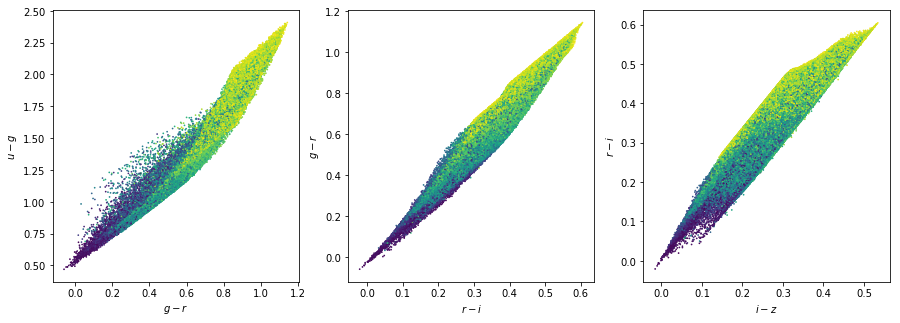

In [23]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].scatter(colors[:,1], colors[:,0], c=f['mean_ages'], s=0.5)
ax[0].set_xlabel('$g-r$')
ax[0].set_ylabel('$u-g$')
ax[1].scatter(colors[:,2], colors[:,1], c=f['mean_ages'], s=0.5)
ax[1].set_xlabel('$r-i$')
ax[1].set_ylabel('$g-r$')
ax[2].scatter(colors[:,3], colors[:,2], c=f['mean_ages'], s=0.5)
ax[2].set_xlabel('$i-z$')
ax[2].set_ylabel('$r-i$')

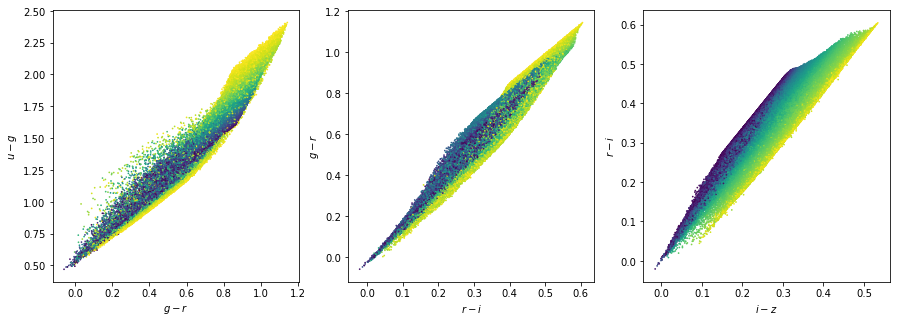

In [24]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].scatter(colors[:,1], colors[:,0], c=f['zs'], s=0.5)
ax[0].set_xlabel('$g-r$')
ax[0].set_ylabel('$u-g$')
ax[1].scatter(colors[:,2], colors[:,1], c=f['zs'], s=0.5)
ax[1].set_xlabel('$r-i$')
ax[1].set_ylabel('$g-r$')
ax[2].scatter(colors[:,3], colors[:,2], c=f['zs'], s=0.5)
ax[2].set_xlabel('$i-z$')
ax[2].set_ylabel('$r-i$')

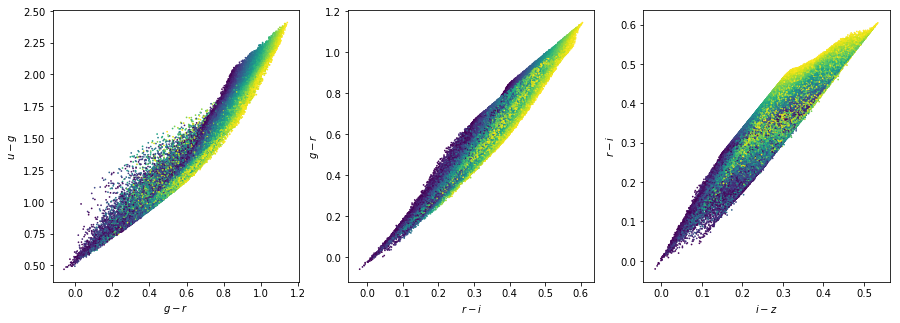

In [25]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].scatter(colors[:,1], colors[:,0], c=f['dusts'], s=0.5)
ax[0].set_xlabel('$g-r$')
ax[0].set_ylabel('$u-g$')
ax[1].scatter(colors[:,2], colors[:,1], c=f['dusts'], s=0.5)
ax[1].set_xlabel('$r-i$')
ax[1].set_ylabel('$g-r$')
ax[2].scatter(colors[:,3], colors[:,2], c=f['dusts'], s=0.5)
ax[2].set_xlabel('$i-z$')
ax[2].set_ylabel('$r-i$')

### Try choosing a "box" in 4D color space; compare histograms in these 3 params to full sample

In [70]:
# better test would be to generate a SP with a simple SFH and get the sdss mags...
test = np.array([1.5, 0.6, 0.3, 0.2])
tol = test * 0.1

In [71]:
inds = np.ones(colors.shape[0], dtype=bool)
for ii in range(colors.shape[1]):
    inds *= (colors[:,ii] > test[ii] - tol[ii]) * (colors[:,ii] < test[ii] + tol[ii])
    print np.sum(inds)

21548
4032
2538
1706


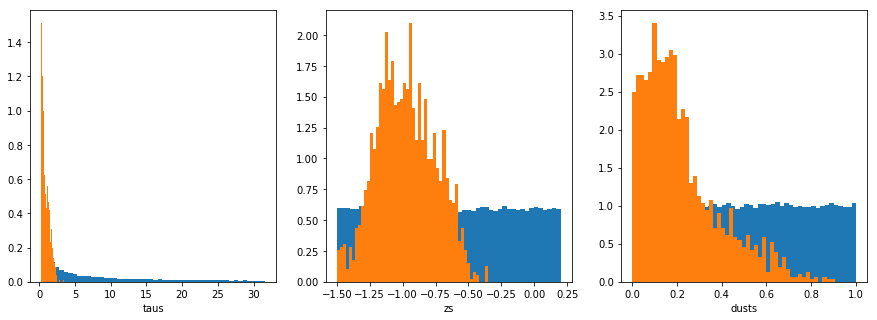

In [74]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
n, bins, patches = ax[0].hist(f['taus'][:], bins=50, normed=True)
n, bins, patches = ax[0].hist(f['taus'][inds], bins=50, normed=True)
ax[0].set_xlabel('taus')
n, bins, patches = ax[1].hist(f['zs'][:], bins=50, normed=True)
n, bins, patches = ax[1].hist(f['zs'][inds], bins=50, normed=True)
ax[1].set_xlabel('zs')
n, bins, patches = ax[2].hist(f['dusts'][:], bins=50, normed=True)
n, bins, patches = ax[2].hist(f['dusts'][inds], bins=50, normed=True)
ax[2].set_xlabel('dusts')

### Try measuring these colors for FSPS spectra

In [42]:
import fsps
sp = fsps.StellarPopulation(compute_vega_mags=False, sfh=4, dust_type=2, dust2=0.3, 
                            tau=5.0, zcontinuous=1, logzsol=0.0, sigma_smooth=100., 
                            add_neb_emission=False, sf_start=2.0)

In [47]:
mags = sp.get_mags(bands=fsps.find_filter('sdss'), tage=13.7)
modeltest = np.array([mags[0]-mags[1], mags[1]-mags[3], mags[3]-mags[2], mags[2]-mags[4]])
modeltol = modeltest * 0.1

In [46]:
modeltest

array([ 0.99702511,  0.42383048,  0.27684992,  0.27857838])

In [49]:
inds = np.ones(colors.shape[0], dtype=bool)
for ii in range(colors.shape[1]):
    inds *= (colors[:,ii] > modeltest[ii] - modeltol[ii]) * (colors[:,ii] < modeltest[ii] + modeltol[ii])
    print np.sum(inds)

26247
12628
8109
2364


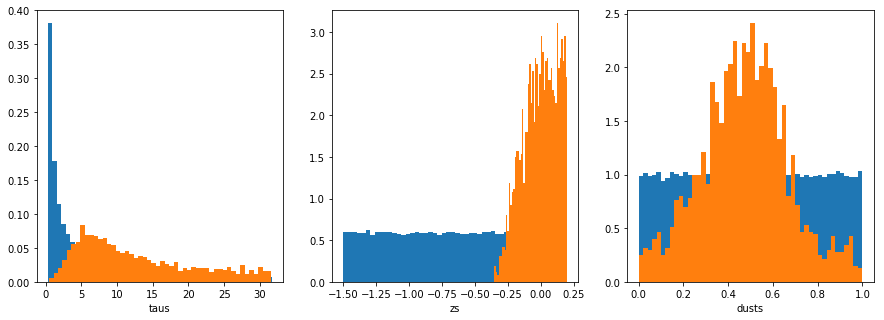

In [51]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
n, bins, patches = ax[0].hist(f['taus'][:], bins=50, normed=True)
n, bins, patches = ax[0].hist(f['taus'][inds], bins=50, normed=True)
ax[0].set_xlabel('taus')
n, bins, patches = ax[1].hist(f['zs'][:], bins=50, normed=True)
n, bins, patches = ax[1].hist(f['zs'][inds], bins=50, normed=True)
ax[1].set_xlabel('zs')
n, bins, patches = ax[2].hist(f['dusts'][:], bins=50, normed=True)
n, bins, patches = ax[2].hist(f['dusts'][inds], bins=50, normed=True)
ax[2].set_xlabel('dusts')

In [52]:
# now do a really old stellar population
sp = fsps.StellarPopulation(compute_vega_mags=False, sfh=4, dust_type=2, dust2=0.1, 
                            tau=0.5, zcontinuous=1, logzsol=0.1, sigma_smooth=100., 
                            add_neb_emission=False, sf_start=1.0)

In [53]:
mags = sp.get_mags(bands=fsps.find_filter('sdss'), tage=13.7)
modeltest = np.array([mags[0]-mags[1], mags[1]-mags[3], mags[3]-mags[2], mags[2]-mags[4]])
modeltol = modeltest * 0.1

In [54]:
inds = np.ones(colors.shape[0], dtype=bool)
for ii in range(colors.shape[1]):
    inds *= (colors[:,ii] > modeltest[ii] - modeltol[ii]) * (colors[:,ii] < modeltest[ii] + modeltol[ii])
    print np.sum(inds)

9131
5657
1873
1867


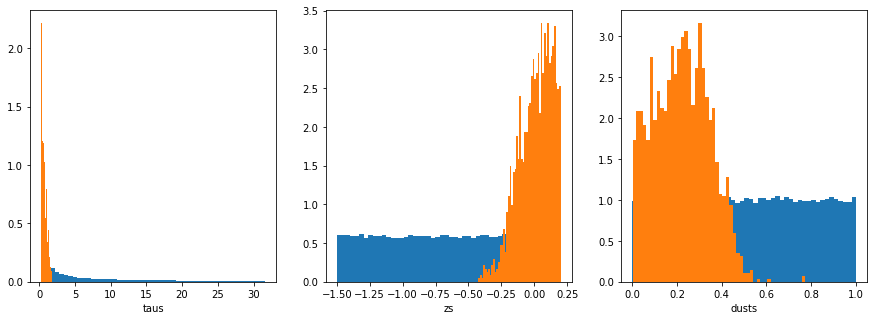

In [55]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
n, bins, patches = ax[0].hist(f['taus'][:], bins=50, normed=True)
n, bins, patches = ax[0].hist(f['taus'][inds], bins=50, normed=True)
ax[0].set_xlabel('taus')
n, bins, patches = ax[1].hist(f['zs'][:], bins=50, normed=True)
n, bins, patches = ax[1].hist(f['zs'][inds], bins=50, normed=True)
ax[1].set_xlabel('zs')
n, bins, patches = ax[2].hist(f['dusts'][:], bins=50, normed=True)
n, bins, patches = ax[2].hist(f['dusts'][inds], bins=50, normed=True)
ax[2].set_xlabel('dusts')

### Try measuring these colors + uncertainties for real MaNGA spectrum

In [56]:
data = np.loadtxt('/Users/Grace/Research/mangafit/data/quiescent/total_8312-1902.txt')

In [57]:
from sedpy.observate import load_filters, getSED

In [61]:
fnames = ['sdss_u0', 'sdss_g0', 'sdss_i0', 'sdss_r0', 'sdss_z0']
filters = load_filters(fnames)
mags = getSED(data[:,0], data[:,1] * 1e-17, filterlist=filters)

# NOPE uncertainty too hard for end of day -- need to get uncertainty on mags from the uncertainties on maggies...
# counts = [f.obj_counts(data[:,0], data[:,1] * 1e-17) for f in obs['filters']]
# unc_counts = [f.obj_counts(data[:,0], data[:,2] * 1e-17 * 10.0) for f in obs['filters']] # inflate uncertainty
# snr = counts[0] / unc_counts[0]
# maggies = np.atleast_1d(10**(-0.4 * mags))
# maggies_unc = maggies / snr

In [63]:
spectest = np.array([mags[0]-mags[1], mags[1]-mags[3], mags[3]-mags[2], mags[2]-mags[4]])
spectol = spectest * 0.1

In [64]:
spectest

array([ 2.5620475 ,  0.84532113,  0.37109988,  0.29601193])

In [68]:
inds = np.ones(colors.shape[0], dtype=bool)
for ii in range(colors.shape[1]):
    if ii == 0:
        # quick hack b/c u-g color eliminates everything
        continue
    inds *= (colors[:,ii] > spectest[ii] - spectol[ii]) * (colors[:,ii] < spectest[ii] + spectol[ii])
    print np.sum(inds)

17648
3702
2310


#### INTERESTING: the measured u-g color is too red for the models to explain here. Do I need a k-correction or something?? 

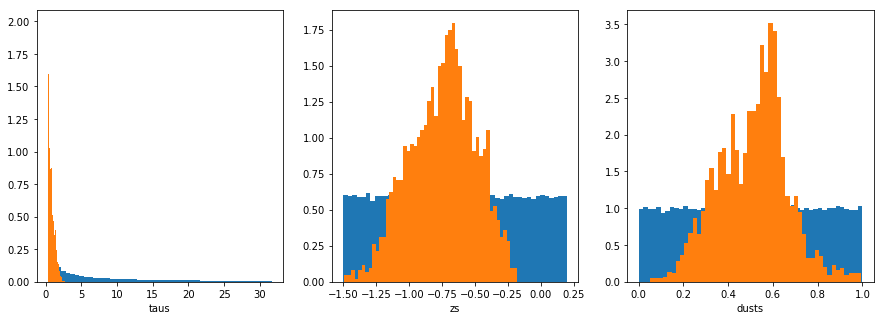

In [69]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
n, bins, patches = ax[0].hist(f['taus'][:], bins=50, normed=True)
n, bins, patches = ax[0].hist(f['taus'][inds], bins=50, normed=True)
ax[0].set_xlabel('taus')
n, bins, patches = ax[1].hist(f['zs'][:], bins=50, normed=True)
n, bins, patches = ax[1].hist(f['zs'][inds], bins=50, normed=True)
ax[1].set_xlabel('zs')
n, bins, patches = ax[2].hist(f['dusts'][:], bins=50, normed=True)
n, bins, patches = ax[2].hist(f['dusts'][inds], bins=50, normed=True)
ax[2].set_xlabel('dusts')